# Урок 3. kNN

В уроке мы разобрали построение модели kNN на базовом наборе данных Iris. Для лучшего понимания, как работает алгоритм, мы использовали только два признака - длину и ширину лепестка. 

Однако другие признаки тоже могли быть важны для получения моделью более детальной информации об объектах и, соответственно, построения более точных прогнозов. 

### 1.
Поочередно добавьте к признакам (petal length, petal width) из урока  оставшиеся признаки, чтобы получилось: 1) (sepal length, petal length, petal width); 2) (sepal width, petal length, petal width).

*Примечание: признаки могут быть расположены в любом порядке.*

In [1]:
from sklearn.datasets import load_iris

Напомним порядок расположения признаков в массиве данных

In [2]:
iris_dataset = load_iris()
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Для формирования массива новых признаков проще воспользоваться не срезами, как мы делали в уроке - iris_dataset.data[:, 2:4] (здесь мы показываем, что выбираем только со 2го по 4й столбец, причем не включая 2й), а просто удалить один из ненужных нам столбцов с помощью функции библиотеки *numpy.delete*

**Пример**

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
a = np.array([[ 0,  1,  2,  3],
               [ 4,  5,  6,  7],
               [ 8,  9, 10, 11],
               [12, 13, 14, 15]])

a_new = np.delete(a, 0, axis=1)
a_new[:3,:]

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11]])

In [5]:
iris_dataset_1 = np.delete(load_iris().data, 1, axis=1)
iris_dataset_2 = np.delete(load_iris().data, 0, axis=1)

id1 = iris_dataset_1
id2 = iris_dataset_2
target = load_iris().target

print(load_iris().data[:3,:], "\n\n", id1[:3, :], "\n\n", id2[:3, :])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]] 

 [[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]] 

 [[3.5 1.4 0.2]
 [3.  1.4 0.2]
 [3.2 1.3 0.2]]


### 2.
Теперь посмотрите на трехмерном графике, насколько хорошо данные разделяются по каждой из совокупностей трех параметров.

In [6]:
# если работаете в интерактивной оболочке IPython 
% matplotlib inline

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

UsageError: Line magic function `%` not found.


**Пример** построения трехмерного графика

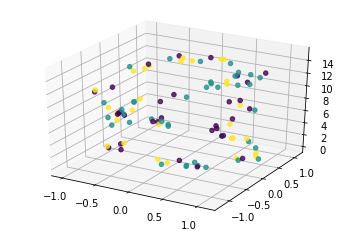

In [9]:
ax = plt.axes(projection='3d')

zdata = 15 * np.random.random(100) # точки оси Z
xdata = np.sin(zdata) + 0.1 * np.random.randn(100) # точки оси X
ydata = np.cos(zdata) + 0.1 * np.random.randn(100) # точки оси Y
colors = np.random.randint(3, size=100)

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=colors)

**Примечание: для установки цвета в функции используйте *c=iris_dataset.target*.**

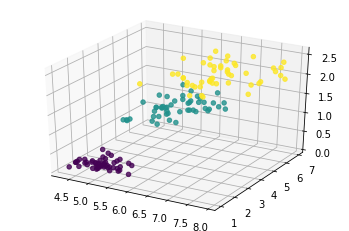

In [10]:
ax = plt.axes(projection='3d')

xdata, ydata, zdata = [id1[:, i:i+1].squeeze() for i in range(0,3)]

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=target)

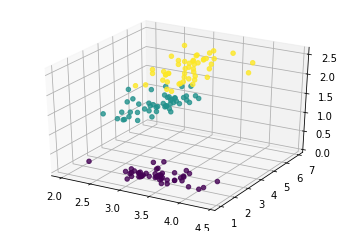

In [11]:
ax = plt.axes(projection='3d')

### YOUR CODE HERE ###
xdata, ydata, zdata = [id2[:, i:i+1].squeeze() for i in range(0,3)]
ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=target)

### 3.
С помощью функции sklearn.model_selection.train_test_split разделите данные на тренировочный и тестовый датасеты и затем, применив библиотечную версию алгоритма sklearn.neighbors.KNeighborsClassifier, постройте модель для наборов данных *iris_dataset_1* и *iris_dataset_2* (по умолчанию используйте n_neighbors=5).

*Примечание: в функции train_test_split используйте параметр random_state=17 для воспроизводимости результатов.*

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [13]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(id1, target, random_state=17)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(id2, target, random_state=17)

K1 = KNeighborsClassifier(n_neighbors=5)
K2 = KNeighborsClassifier(n_neighbors=5)
K1.fit(x_train_1, y_train_1)
K2.fit(x_train_2, y_train_2)


KNeighborsClassifier()

### 4.
Проверьте точность работы обеих моделей, используя встроенную функцию sklearn.metrics.accuracy_score. Сравните результат их работы с результатом, полученным на наборе данных с двумя признаками (который разбирался в уроке), и укажите ответ.

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_1 = accuracy_score(y_test_1 , K1.predict(x_test_1))
accuracy_2 = accuracy_score(y_test_2, K2.predict(x_test_2))

print(f'Accuracy_1: {accuracy_1}, accuracy_2: {accuracy_2}')
#Совпадает точно и везде, значит все идеально разделимо

Accuracy_1: 0.9736842105263158, accuracy_2: 0.9736842105263158


### 5.
Постройте модель на данных *x_train_1, y_train_1* с гиперпараметром n_neighbors, пробегающим значения от 1 до 20 включительно, и укажите значения n_neighbors, которым соответствует наиболее высокий результат функции accuracy_score().

*Примечание: можно воспользоваться циклом for, чтобы не прописывать вручную все 20 вариаций модели.*

In [16]:
scores = []
for i in range(1,21):
    K = KNeighborsClassifier(n_neighbors=i)
    K.fit(x_train_1, y_train_1)
    scores.append(accuracy_score(y_test_1, K.predict(x_test_1)))

print(scores)
print(np.argmax(scores))

[0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9473684210526315, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9210526315789473, 0.9473684210526315, 0.9210526315789473, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473]
0
